In [2]:
import pandas as pd 
import numpy as np 
from langdetect import detect

## Get data

In [51]:
#data = pd.read_excel('List_Songs-HIPPOP.xlsx')
data = pd.read_csv('List_Songs_Lyrics_P.csv') #,lineterminator='\n')
data = data[['Lyrics', 'Title', 'Year', 'Genre']]

In [53]:
#data.loc[data['Genre'] == 'Reggae']

# Overview of the rows that are dropped

In [42]:

print('Initial number of songs', len(data))

data1 = data[data.Lyrics != 'NONE']

print('After removal of songs with no lyrics' , len(data1))

data2 = data1.loc[data1['Lyrics'].apply(detect) == 'en']
print('Number of remaining songs that are in English', len(data2))
 
# Split into two dataframes by genre    
pop_df = data2[['Lyrics','Title','Year']].loc[data2['Genre'] == 'Reggae']
hiphop_df = data2[['Lyrics','Title','Year']].loc[data2['Genre'] == 'Hip Hop']

# Inner join to get the songs that are in both
df12 = pd.merge(hiphop_df,pop_df, on=['Title','Year','Lyrics'], how='inner')     #extract common rows with merge
final_hiphop = hiphop_df[~hiphop_df['Lyrics'].isin(df12['Lyrics'])]
final_pop = pop_df[~pop_df['Lyrics'].isin(df12['Lyrics'])]

print('Number of songs that are in both genres (and thus removed twice)',len(df12))

final_hiphop.head(100)

Initial number of songs 13248
After removal of songs with no lyrics 8957
Number of remaining songs that are in English 8166
Number of songs that are in both genres (and thus removed twice) 2795


,Lyrics,Title,Year
4873,行くぜ\n横浜・東京・大阪・関東近郊\n信越・北陸・東海・近畿\n・中国・四国・が連動\n九...,Bring It On,2007
5050,Stephen da gyal deh belly too flat an too even...,Come Breed Me,NONE
5607,[2x]london calling Speak the slang now Boys sa...,Galang,2005
5947,Major Lazer I make ya I make ya I make ya I...,Hold the Line,2009
6763,Un deux trois cha cha cha Piripipon que ri...,Melting Pot,1996
8832,Uh uh uh\nI just gotta bring it to they attent...,#1,2002
8833,\n\nChorus (2x):(Mannie Fresh)\nAll the nigga...,#1,2002
8834,[Rich Nice] What I want you to understand is...,#1 Player,1995
8835,Nigga can't out-stunt me when it come to these...,#1 Stunna,2000
8836,Girl it's your birthday (birthday) in here (in...,#BDAY,NONE


# Data tidying function

In [54]:
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [55]:
#stop_words

In [58]:
def tidy_data(df):
    start_len = len(df)
    ### Function that takes as input the dataframe and outputs the clean dataframe 
    
    # Drop rows where Lyrics = None
    df = df[df.Lyrics != 'NONE']
    
    # Detect language and drop all rows where language is not English
    df['Language'] = df['Lyrics'].apply(detect)
    df = df.loc[df['Language'] == 'en']
    df = df.drop(['Language'], axis=1)
    
    # Find lyrics that are in both genres and remove them both 
    # Split into two dataframes by genre    
    pop_df = data2[['Lyrics','Title','Year']].loc[data2['Genre'] == 'Pop']
    hiphop_df = data2[['Lyrics','Title','Year']].loc[data2['Genre'] == 'Hip Hop']

    # Inner join to get the songs that are in both
    df12 = pd.merge(hiphop_df,pop_df, on=['Title','Year','Lyrics'], how='inner')     #extract common rows with merge
    final_hiphop = hiphop_df[~hiphop_df['Lyrics'].isin(df12['Lyrics'])]
    final_pop = pop_df[~pop_df['Lyrics'].isin(df12['Lyrics'])]
    
    #Combine
    hiphop_pop_concat = pd.concat([final_hiphop,final_pop])
    
    #Put 'Genres' back on
    final_df = pd.merge(hiphop_pop_concat,pd.DataFrame(df[['Lyrics','Genre']]),on='Lyrics',how='left')
    
    #df = df.drop_duplicates(subset=['Lyrics', 'Title', 'Year'], keep=False)
    final_df = final_df.drop_duplicates()

    #Apply tokenizer
    final_df['Lyrics'] = final_df['Lyrics'].apply(spacy_tokenizer)
    
    # Remove None values create decade column and 
    final_df['Year'].replace('NONE',None, inplace=True)
    final_df['Title'].replace('NONE',None, inplace=True)
    #final_df['Year_decade'] = pd.to_numeric(final_df['Year'])//10*10
  
    # Get genre dummies 
    dummy=pd.get_dummies(final_df["Genre"])
    final_df = pd.concat([final_df, dummy], axis=1)
    
    tidied_len = len(final_df)
    print('Function removed', start_len - tidied_len, 'out of', start_len, 'rows')
    
    return final_df #(df)

In [59]:
data = tidy_data(data)
data.head(10)

#data.to_excel(r'20190827 - TidiedData.xlsx')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Function removed 5325 out of 13248 rows


,Lyrics,Title,Year,Genre,Hip Hop,Reggae
0,"[rasta, ozzy, hill, decide, check, grocery, bi...","""Dat""",NONE,Reggae,0,1
1,"[rasta, ozzy, hill, decide, check, grocery, bi...","""Dat""",NONE,Hip Hop,1,0
2,"[day, like, waste, eh, uh, huh, bo'y'know, til...",'Til I'm Laid to Rest,1995,Reggae,0,1
3,"[day, like, waste, eh, uh, huh, bo'y'know, til...",'Til I'm Laid to Rest,1995,Hip Hop,1,0
4,"[aww, bat, eye, pack, bag, leave, thought, sta...",(Baby) Can I Change My Mind,2003,Reggae,0,1
5,"[aww, bat, eye, pack, bag, leave, thought, sta...",(Baby) Can I Change My Mind,2003,Hip Hop,1,0
6,"[dawn, new, era, dawn, new, era, meet, girl, a...",(Dawning of A) New Era,1994,Reggae,0,1
8,"[dawn, new, era, dawn, new, era, meet, girl, a...",(Dawning of A) New Era,1994,Hip Hop,1,0
10,"[dawn, new, era, dawn, new, era, meet, girl, a...",(Dawning of A) New Era,1979,Reggae,0,1
11,"[dawn, new, era, dawn, new, era, meet, girl, a...",(Dawning of A) New Era,1979,Hip Hop,1,0


In [60]:
len(data.loc[data['Genre'] == 'Hip Hop'])

5420

In [61]:
len(data.loc[data['Genre'] == 'Reggae'])

2499

# Descriptive analysis - the year variable

Ideas: 
- Do we swear more now than before? 
- Do newer songs use more or less disrespectful language towards women? 
- Which genres swear more? (obvious...) 

Calculate avg number of swear words per song.
- Get list of swear words 
- Count how many swear words in each song - store number in new column 
- avg(number_of_swearwords) group by year, genre 


In [69]:
data['Year'].replace('NONE',None, inplace=True)
data['Year_decade'] = pd.to_numeric(data['Year'])//10*10
  

ValueError: Unable to parse string "NONE" at position 0

In [62]:
#get list of swear words
profanity_url = 'http://www.bannedwordlist.com/lists/swearWords.txt'

import requests

profanity = requests.get(profanity_url).text
profanity = set(profanity.split('\r\n'))

#input extra swear words
extras = {'f*ck','f**k','f*cked','f*ckin','f*cking','nigga', 'niggas', 'b*tch', 'bitches', 'b*tches'}

#union the two sets 
prof = profanity.union(extras)

In [63]:
def profanity_check(document, dictionary):
    # Function that counts how many swear words are in a song. Input one tokenized song, output is the count. 
    list_match = []
    
    for word in document: 
        if word in dictionary:
             list_match.append(word)

    return len(list_match) 
    

In [64]:
 

# Apply profanity check function to Lyrics 
data['Profanity_count'] = data['Lyrics'].apply(profanity_check, args=[prof])

data.head()

,Lyrics,Title,Year,Genre,Hip Hop,Reggae,Profanity_count
0,"[rasta, ozzy, hill, decide, check, grocery, bi...","""Dat""",NONE,Reggae,0,1,0
1,"[rasta, ozzy, hill, decide, check, grocery, bi...","""Dat""",NONE,Hip Hop,1,0,0
2,"[day, like, waste, eh, uh, huh, bo'y'know, til...",'Til I'm Laid to Rest,1995,Reggae,0,1,0
3,"[day, like, waste, eh, uh, huh, bo'y'know, til...",'Til I'm Laid to Rest,1995,Hip Hop,1,0,0
4,"[aww, bat, eye, pack, bag, leave, thought, sta...",(Baby) Can I Change My Mind,2003,Reggae,0,1,0


In [65]:
g1 = pd.DataFrame(data.groupby(['Year_decade', 'Genre']).mean()).reset_index()

KeyError: 'Year_decade'

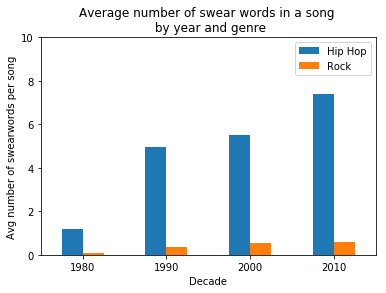

In [66]:
# Only continue with songs from 1980's and forth
g1 = g1.loc[g1['Year_decade'] >= 1980]

# Create bar plot 
import matplotlib.pyplot as plt 

g1 = g1[['Genre', 'Year_decade', 'Profanity_count']]

ax = g1.pivot('Year_decade','Genre',  'Profanity_count').plot(kind='bar')
ax.set_title('Average number of swear words in a song \n by year and genre')
plt.ylabel('Avg number of swearwords per song')
plt.xlabel('Decade')
plt.xticks(rotation='horizontal')
plt.yticks(np.arange(0, 12, step=2))

plt.legend(loc=1)
plt.show()

# Most used words 

In [23]:
def count_per_song(list_of_strings, words_dictionary):
    for i in range(len(list_of_strings)): 
    
        if list_of_strings[i] in words_dictionary: 
            #print(word)
            words_dictionary[list_of_strings[i]] += 1
        else:
            words_dictionary[list_of_strings[i]] = 1
            
    return words_dictionary

In [26]:
hiphop_df = data.loc[data['Genre'] == 'Hip Hop']
pop_df = data.loc[data['Genre'] == 'Pop']
rock_df = data.loc[data['Genre'] == 'Rock']


hiphop = {}
word_count_hip = hiphop_df['Lyrics'].apply(count_per_song, args=[hiphop])
hiphop

rock = {}
word_count_rock = rock_df['Lyrics'].apply(count_per_song, args=[rock])
rock


{'wait': 176,
 'patiently': 3,
 'lord': 67,
 'incline': 2,
 'hear': 231,
 'cry': 180,
 'bring': 99,
 'pit': 3,
 'mire': 3,
 'clay': 6,
 'sing': 154,
 'new': 140,
 'song': 131,
 'long': 281,
 'set': 80,
 'foot': 79,
 'rock': 391,
 'footstep': 3,
 'firm': 3,
 'fear': 41,
 '40': 14,
 'waited': 1,
 'inclined': 1,
 'lift': 17,
 'thank': 17,
 'good': 203,
 'night': 363,
 'hand': 151,
 'look': 301,
 "'em": 13,
 'shake': 68,
 'repeat': 26,
 'drop': 35,
 'needle': 3,
 'dance': 92,
 'ghost': 11,
 'oh': 684,
 'way': 368,
 'stay': 128,
 'friend': 87,
 'hey': 170,
 'turn': 138,
 'record': 24,
 'flip': 15,
 'key': 21,
 'engine': 7,
 'let': 420,
 'somebody': 53,
 'lie': 129,
 'heart': 226,
 'bleed': 22,
 'baby': 447,
 'deep': 55,
 'tick': 9,
 'hour': 89,
 'lonely': 85,
 'alarm': 2,
 'use': 107,
 'sleep': 78,
 'arm': 77,
 'sense': 28,
 'love': 927,
 'line': 111,
 'straight': 20,
 'narrow': 3,
 'try': 247,
 'true': 69,
 'chance': 53,
 'beginning': 2,
 'win': 15,
 'lose': 138,
 'high': 101,
 'blue': 79,

In [30]:
wordcount_hiphop_df = pd.DataFrame.from_dict(hiphop, orient='index')
wordcount_hiphop_df.columns = ['Count']

wordcount_rock_df = pd.DataFrame.from_dict(rock, orient='index')
wordcount_rock_df.columns = ['Count']


hiphop_sorted = wordcount_hiphop_df.sort_values(by=['Count'],ascending=False)
rock_sorted = wordcount_rock_df.sort_values(by=['Count'],ascending=False)


hiphop_sorted.head(15)
rock_sorted.head(15)



print(hiphop_sorted.head(15).to_latex())
print(rock_sorted.head(15).to_latex())


\begin{tabular}{lr}
\toprule
{} &  Count \\
\midrule
like  &   3962 \\
know  &   3394 \\
love  &   2703 \\
want  &   2065 \\
come  &   1874 \\
time  &   1796 \\
baby  &   1679 \\
oh    &   1666 \\
let   &   1557 \\
nigga &   1480 \\
man   &   1402 \\
way   &   1368 \\
yes   &   1366 \\
feel  &   1271 \\
tell  &   1226 \\
\bottomrule
\end{tabular}

\begin{tabular}{lr}
\toprule
{} &  Count \\
\midrule
love  &    927 \\
know  &    842 \\
like  &    691 \\
oh    &    684 \\
come  &    673 \\
want  &    619 \\
time  &    587 \\
day   &    458 \\
baby  &    447 \\
feel  &    435 \\
let   &    420 \\
rock  &    391 \\
yes   &    386 \\
way   &    368 \\
night &    363 \\
\bottomrule
\end{tabular}



# Bigram

In [150]:
from collections import Counter
from nltk.util import ngrams 


#string_list = data['Lyrics'][100]

#text = "the quick person did not realize his speed and the quick person bumped "
#n_gram = 2
#bigram = Counter(ngrams(string_list, n_gram))


#bigram_df = pd.DataFrame.from_dict(bigram, orient='index')
#bigram_df.head(20)
#bigram_df.columns = ['Count']



#bigram_sorted = bigram_df.sort_values(by=['Count'],ascending=False)

#bigram_sorted.head(20)



In [151]:
#text = "the quick person did not realize his speed and the quick person bumped "
#n_gram = 2

Counter(ngrams(text.split(), n_gram))


hiphop = {}
word_count_hip = hiphop_df['Lyrics'].apply(count_per_song, args=[hiphop])
hiphop

{'uh': 142,
 'bring': 107,
 'attention': 11,
 'dirty': 31,
 'watch': 152,
 'talkin': 47,
 'bout': 160,
 'runnin': 41,
 'mouth': 62,
 'like': 1319,
 'know': 913,
 'gon': 143,
 'f*ck': 366,
 'hold': 171,
 'hanes': 1,
 'way': 422,
 'wear': 43,
 'stitch': 1,
 'pant': 20,
 'resident': 2,
 'france': 2,
 'swear': 27,
 'paris': 3,
 'karats': 3,
 'total': 4,
 'naw': 11,
 'wrist': 33,
 'trying': 15,
 'compare': 6,
 'chain': 35,
 'yo': 334,
 'sprint': 1,
 'motorola': 4,
 'service': 6,
 'range': 17,
 'brain': 21,
 'thinkin': 40,
 "i'mma": 41,
 'shout': 13,
 'come': 569,
 'catch': 100,
 'fame': 23,
 'pressure': 10,
 'applyin': 1,
 'time': 493,
 'ease': 8,
 'hit': 277,
 'blindside': 1,
 'takin': 25,
 'sleeve': 4,
 'floss': 11,
 'hard': 130,
 'boss': 26,
 'lyin': 5,
 'bitchin': 2,
 'cryin': 12,
 'suck': 20,
 'loss': 5,
 'act': 54,
 'wack': 14,
 'label': 10,
 'matt': 50,
 'fact': 31,
 'eh': 7,
 'numb': 59,
 'sit': 64,
 'write': 67,
 'ey': 22,
 'let': 422,
 'ask': 103,
 'man': 379,
 'doe': 27,
 'winner

In [74]:
#total_dictionary = Counter()

def bigram_song(list_of_strings, total_dictionary = Counter()):
    n_gram = 2

    song_dictionary = Counter(ngrams(list_of_strings, n_gram))
    
    total_dictionary += song_dictionary
    
    return total_dictionary  

In [76]:

bigram_hip = hiphop_df['Lyrics'].apply(bigram_song) #, args = [total_dictionary])

 

bigram_df = pd.DataFrame.from_dict(bigram_hip[0], orient='index')
bigram_df.columns = ['Count']

bigram_sorted = bigram_df.sort_values(by=['Count'],ascending=False)

bigram_sorted.head(20)

,Count
"(love, love)",318
"(lie, lie)",288
"(da, da)",224
"(oh, oh)",186
"(yes, yes)",162
"(gangsta, party)",160
"(bay, bay)",156
"(ay, bay)",148
"(1, 2)",130
"(niggas, know)",112
